In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/ИИ/дб'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/ИИ/дб/Happy/110754-utyeqqosky-1547658396.jpeg
/content/drive/MyDrive/ИИ/дб/Happy/5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png
/content/drive/MyDrive/ИИ/дб/Happy/220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
/content/drive/MyDrive/ИИ/дб/Happy/170404-happy-workers-feature.jpg
/content/drive/MyDrive/ИИ/дб/Happy/05-12-21-happy-people.jpg
/content/drive/MyDrive/ИИ/дб/Happy/56f455011e0000b300705475.jpeg
/content/drive/MyDrive/ИИ/дб/Happy/427394C200000578-0-image-a-24_1500384481554.jpg
/content/drive/MyDrive/ИИ/дб/Happy/2560px-Happy_People.jpg
/content/drive/MyDrive/ИИ/дб/Happy/1920px-face-smile.svg_.png.jpg
/content/drive/MyDrive/ИИ/дб/Happy/35438_hd.jpg
/content/drive/MyDrive/ИИ/дб/Happy/7VR73K6EP5ETVEOUFANWBUYJEQ.jpg
/content/drive/MyDrive/ИИ/дб/Happy/20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
/content/drive/MyDrive/ИИ/дб/Happy/613k1XcpYCL.jpg
/content/drive/MyDrive/ИИ/дб/Happy/1HEoLBLidT2u4mhJ0oiDgig.png
/content/drive/MyDrive/ИИ/

# Import libraries and data

## Libraries

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import shutil
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from PIL import Image

%matplotlib inline
warnings.filterwarnings('ignore')

## Data

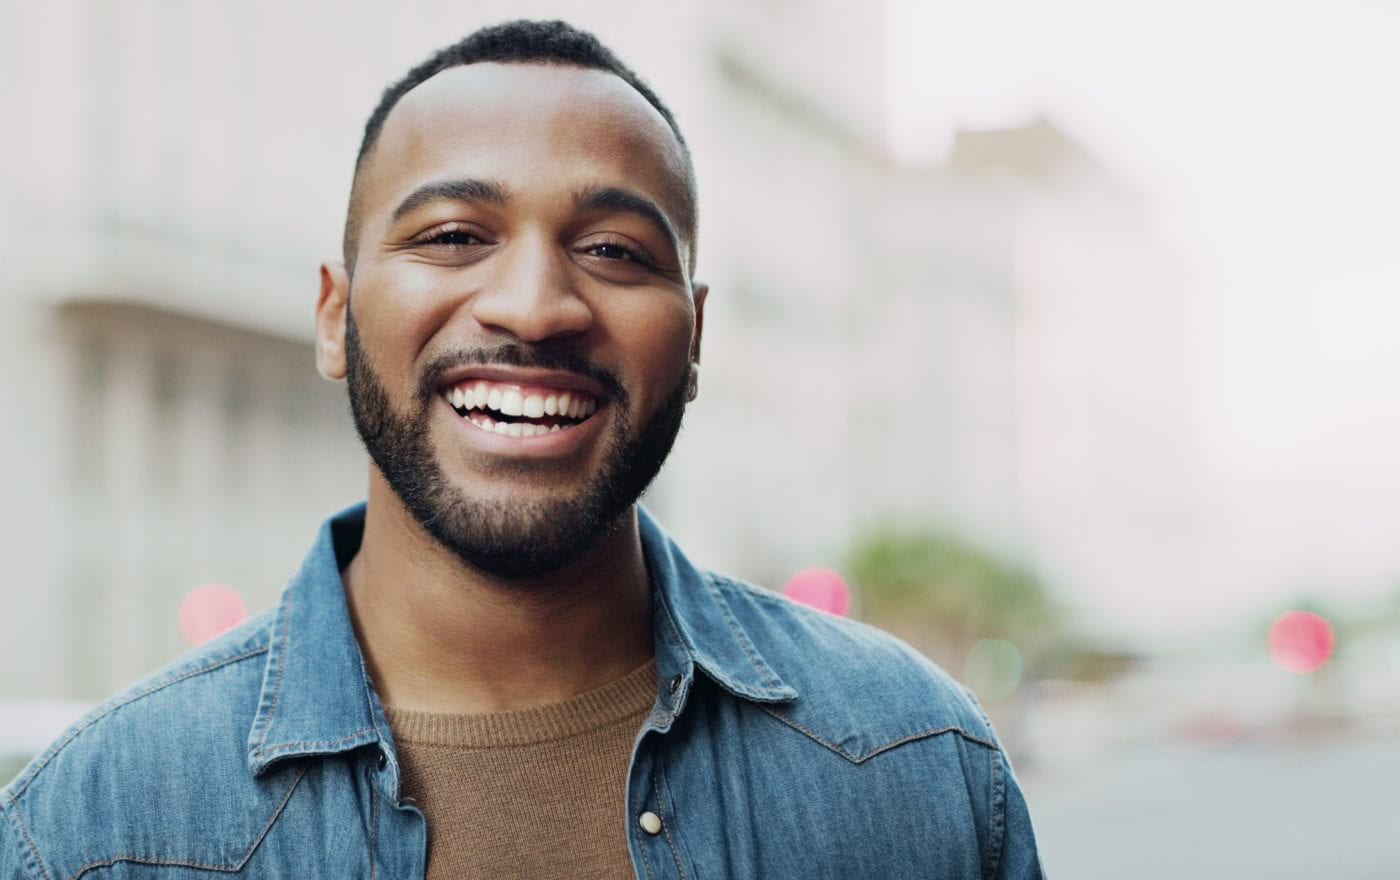

In [ ]:
random_path = '/content/drive/MyDrive/ИИ/дб/Happy/05-12-21-happy-people.jpg'
Image.open(random_path)

In [ ]:
PATH = '/content/drive/MyDrive/ИИ/дб'

img_dir = Path(PATH)
files = list(img_dir.glob('**/*.jpg'))

In [ ]:
# For illustration purpose
print(os.path.split(files[0]))
print(os.path.split(files[0])[0])
print(os.path.split(files[0])[0].split('/')[-1])

label = list(map(lambda x: os.path.split(x)[0].split('/')[-1], files))

('/content/drive/MyDrive/ИИ/дб/Happy', '220px-Happy_People_A_Year_in_the_Taiga_poster.jpg')
/content/drive/MyDrive/ИИ/дб/Happy
Happy


In [ ]:
paths = pd.Series(files,name='Path').astype(str)
labels = pd.Series(label,name='Label')
df = pd.concat([paths,labels],axis=1)

display(df.head())
display(df.tail())
display(df.shape)

,Path,Label
0,/content/drive/MyDrive/ИИ/дб/Happy/220px-Happy...,Happy
1,/content/drive/MyDrive/ИИ/дб/Happy/170404-happ...,Happy
2,/content/drive/MyDrive/ИИ/дб/Happy/05-12-21-ha...,Happy
3,/content/drive/MyDrive/ИИ/дб/Happy/427394C2000...,Happy
4,/content/drive/MyDrive/ИИ/дб/Happy/2560px-Happ...,Happy


,Path,Label
211,/content/drive/MyDrive/ИИ/дб/Sad/secret-signs-...,Sad
212,/content/drive/MyDrive/ИИ/дб/Sad/sad-woman.jpg,Sad
213,/content/drive/MyDrive/ИИ/дб/Sad/strated-depre...,Sad
214,/content/drive/MyDrive/ИИ/дб/Sad/sad.jpg,Sad
215,/content/drive/MyDrive/ИИ/дб/Sad/what-successf...,Sad


(216, 2)

### Splitting into train and test/validation sets

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(df.Path, df.Label, test_size = 0.2, shuffle = True, random_state = 42)
display(X_tr)
display(y_tr)

,Path
84,/content/drive/MyDrive/ИИ/дб/Angry/19_1016_DIS...
95,/content/drive/MyDrive/ИИ/дб/Angry/YdGPmBa6UZj...
137,/content/drive/MyDrive/ИИ/дб/Angry/online-vide...
211,/content/drive/MyDrive/ИИ/дб/Sad/secret-signs-...
86,/content/drive/MyDrive/ИИ/дб/Angry/32209658.jpg
...,...
106,/content/drive/MyDrive/ИИ/дб/Angry/anger-can-k...
14,/content/drive/MyDrive/ИИ/дб/Happy/friends-hap...
92,/content/drive/MyDrive/ИИ/дб/Angry/anger_ruini...
179,/content/drive/MyDrive/ИИ/дб/Sad/dreamstime_s_...


,Label
84,Angry
95,Angry
137,Angry
211,Sad
86,Angry
...,...
106,Angry
14,Happy
92,Angry
179,Sad


# EDA

In [ ]:
df.Label.value_counts()

,count
Label,
Happy,80
Sad,69
Angry,67


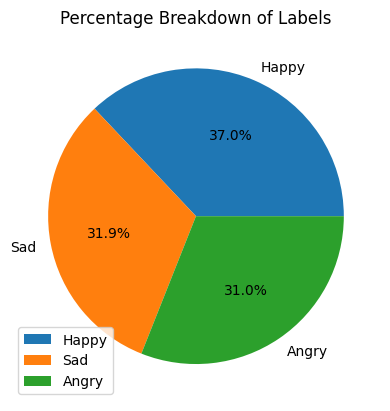

In [ ]:
plt.pie(df.Label.value_counts().values, labels=df.Label.value_counts().index, autopct='%1.1f%%')
plt.legend(loc = 'lower left')
plt.title('Percentage Breakdown of Labels')
plt.show();

It is fairly distributed.

In [ ]:
# a random example
import random
random_paths = X_tr.sample(10)
random_img = [plt.imread(x) for x in random_paths]
random_img_dim = [x.shape for x in random_img]
random_img_dim

[(400, 620, 3),
 (1533, 2300, 3),
 (900, 559, 3),
 (880, 1400, 3),
 (593, 809, 3),
 (321, 626, 3),
 (900, 1600, 3),
 (268, 360, 3),
 (387, 900, 3),
 (419, 800, 3)]

In [ ]:
class_names = np.array(sorted([item.name for item in img_dir.glob('*')]))
class_names

array(['Angry', 'Happy', 'Sad'], dtype='<U5')

In [ ]:
tr, val = pd.concat([X_tr, y_tr], axis = 1).reset_index(drop = True), pd.concat([X_val, y_val], axis = 1).reset_index(drop = True)
display(tr.head())
display(val.head())

,Path,Label
0,/content/drive/MyDrive/ИИ/дб/Angry/19_1016_DIS...,Angry
1,/content/drive/MyDrive/ИИ/дб/Angry/YdGPmBa6UZj...,Angry
2,/content/drive/MyDrive/ИИ/дб/Angry/online-vide...,Angry
3,/content/drive/MyDrive/ИИ/дб/Sad/secret-signs-...,Sad
4,/content/drive/MyDrive/ИИ/дб/Angry/32209658.jpg,Angry


,Path,Label
0,/content/drive/MyDrive/ИИ/дб/Sad/sad-people.jpg,Sad
1,/content/drive/MyDrive/ИИ/дб/Sad/strated-depre...,Sad
2,/content/drive/MyDrive/ИИ/дб/Angry/angry-perso...,Angry
3,/content/drive/MyDrive/ИИ/дб/Sad/all-those-peo...,Sad
4,/content/drive/MyDrive/ИИ/дб/Happy/Happiness-H...,Happy


# Pytorch

In [ ]:
import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

In [ ]:
display(tr.head())
display(val.head())

,Path,Label
0,/content/drive/MyDrive/ИИ/дб/Angry/19_1016_DIS...,Angry
1,/content/drive/MyDrive/ИИ/дб/Angry/YdGPmBa6UZj...,Angry
2,/content/drive/MyDrive/ИИ/дб/Angry/online-vide...,Angry
3,/content/drive/MyDrive/ИИ/дб/Sad/secret-signs-...,Sad
4,/content/drive/MyDrive/ИИ/дб/Angry/32209658.jpg,Angry


,Path,Label
0,/content/drive/MyDrive/ИИ/дб/Sad/sad-people.jpg,Sad
1,/content/drive/MyDrive/ИИ/дб/Sad/strated-depre...,Sad
2,/content/drive/MyDrive/ИИ/дб/Angry/angry-perso...,Angry
3,/content/drive/MyDrive/ИИ/дб/Sad/all-those-peo...,Sad
4,/content/drive/MyDrive/ИИ/дб/Happy/Happiness-H...,Happy


In [ ]:
label_to_int = {label: i for i, label in enumerate(tr.Label.unique())}
tr.Label = tr.Label.map(label_to_int)
val.Label = val.Label.map(label_to_int)

In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, df, transform = None):
        self.df = df
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_path = self.df.loc[idx, 'Path']
        image = Image.open(img_path).convert('RGB')
        label = self.df.loc[idx, 'Label']

        if self.transform:
            image = self.transform(image)

        return image, torch.tensor(label)

In [ ]:
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),  # scales the image's pixel intensities to the range [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [ ]:
train = CustomImageDataset(tr, transform = transform)
valid = CustomImageDataset(val, transform = transform)

In [ ]:
BATCH_SIZE = 32
train_loader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(valid, batch_size=BATCH_SIZE)

In [ ]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

## Basic Net Model

In [ ]:
class ConvNet(nn.Module):
    def __init__(self, num_classes = 3):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 5, kernel_size = 3, padding = 1)
        self.conv2 = nn.Conv2d(5, 5, kernel_size = 3, padding = 1)
        self.pool = nn.MaxPool2d(2,2)
        self.conv3 = nn.Conv2d(5, 5, kernel_size = 3, padding = 1)
        self.conv4 = nn.Conv2d(5, 5, kernel_size = 3, padding = 1)
        self.fc1 = nn.Linear(5*56*56, 128)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 3)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = F.relu(self.conv3(x))
        x = self.pool(F.relu(self.conv4(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x, dim =1)


In [ ]:
import torch.optim as optim

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = ConvNet()
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

In [ ]:
pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 20.2 MB/s eta 0:00:00


In [ ]:
import torchmetrics
accuracy_metric = torchmetrics.Accuracy(task = 'multiclass', num_classes = 3).to(device)

In [ ]:
def train_step(model: torch.nn.Module,
         data_loader: torch.utils.data.DataLoader,
         criterion: torch.nn.Module,
         optimizer: torch.optim.Optimizer,
         accuracy_fn: torchmetrics.Accuracy,
         device: torch.device = device):

    train_loss, train_acc = 0, 0
    model.train()
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        logits = model(X)
        loss = criterion(logits, y)
        train_loss += loss.item()

        preds = logits.argmax(dim = 1)
        train_acc += accuracy_fn(preds, y).item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              criterion: torch.nn.Module,
              accuracy_fn: torchmetrics.Accuracy,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_logits = model(X)

            # 2. Calculate loss and accuracy
            test_loss += criterion(test_logits, y)
            preds = test_logits.argmax(dim = 1)
            test_acc += accuracy_fn(preds, y)

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [ ]:
epochs = 5
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_loader,
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        accuracy_fn=accuracy_metric
    )
    test_step(data_loader=val_loader,
        model=model,
        criterion=criterion,
        accuracy_fn=accuracy_metric
    )

Epoch: 0
---------
Train loss: 1.12706 | Train accuracy: 0.39%
Test loss: 1.10607 | Test accuracy: 0.23%

Epoch: 1
---------
Train loss: 1.11040 | Train accuracy: 0.32%
Test loss: 1.14009 | Test accuracy: 0.23%

Epoch: 2
---------
Train loss: 1.10207 | Train accuracy: 0.37%
Test loss: 1.13075 | Test accuracy: 0.23%

Epoch: 3
---------
Train loss: 1.08953 | Train accuracy: 0.41%
Test loss: 1.11788 | Test accuracy: 0.23%

Epoch: 4
---------
Train loss: 1.09988 | Train accuracy: 0.34%
Test loss: 1.12857 | Test accuracy: 0.23%



## Transfer Learning

In [ ]:
import torchvision

weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [ ]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [ ]:
train = CustomImageDataset(tr, transform = auto_transforms)
valid = CustomImageDataset(val, transform = auto_transforms)

In [ ]:
BATCH_SIZE = 32
train_loader = DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(valid, batch_size=BATCH_SIZE)

In [ ]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
model = torchvision.models.efficientnet_b0(weights=weights).to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth
100%|██████████| 20.5M/20.5M [00:00<00:00, 25.7MB/s]


In [ ]:
for param in model.features.parameters():
    param.requires_grad = False

In [ ]:
model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True),
    torch.nn.Linear(in_features=1280,
                    out_features=3,
                    bias=True)).to(device)

In [ ]:
for param in model.features[8].parameters():
    param.requires_grad = True

In [ ]:
pip install torchinfo

In [ ]:
from torchinfo import summary
summary(model=model,
        input_size=(32, 3, 224, 224),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 3]              --                   Partial
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   Partial
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   False
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   (864)                False
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   (64)                 False
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 5
for epoch in range(epochs):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_loader,
        model=model,
        criterion=criterion,
        optimizer=optimizer,
        accuracy_fn=accuracy_metric
    )
    test_step(data_loader=val_loader,
        model=model,
        criterion=criterion,
        accuracy_fn=accuracy_metric
    )

Epoch: 0
---------
Train loss: 1.02841 | Train accuracy: 0.49%
Test loss: 0.94337 | Test accuracy: 0.67%

Epoch: 1
---------
Train loss: 0.69814 | Train accuracy: 0.81%
Test loss: 0.93098 | Test accuracy: 0.55%

Epoch: 2
---------
Train loss: 0.51235 | Train accuracy: 0.88%
Test loss: 0.90122 | Test accuracy: 0.72%

Epoch: 3
---------
Train loss: 0.36451 | Train accuracy: 0.95%
Test loss: 0.86323 | Test accuracy: 0.72%

Epoch: 4
---------
Train loss: 0.28098 | Train accuracy: 0.97%
Test loss: 0.84901 | Test accuracy: 0.72%



In [ ]:
torch.save(model, 'efficientnet_b0_full.pth')

In [ ]:
torch.save(model.state_dict(), 'efficientnet_b0.pth')